In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

rc('font',family=font_name) # 한글 폰트

In [2]:
data=pd.read_csv('Traffic_Accident_2017.csv', encoding='euc-kr')
data.head(3)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069


In [3]:
#요일별 사고 건수
temp = data['요일'].value_counts()
temp

화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: 요일, dtype: int64

In [4]:
t=temp[['월','화','수','목','금','토','일']]
t

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

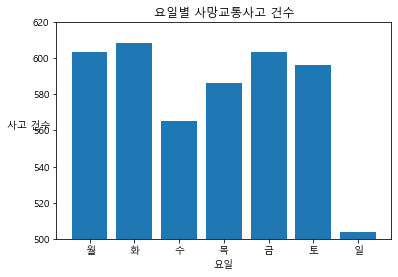

In [5]:
x=t.index
plt.bar(x,t)
plt.ylim(500,620)
plt.xlabel('요일')
plt.ylabel('사고 건수').set_rotation(0)
plt.title('요일별 사망교통사고 건수')
plt.show()

In [6]:
# 차대차 사건중 죽거나 다친 사람이 많은 발생지 시도를 시각화
car = data[data['사고유형_대분류'] == '차대차']

In [7]:
# car에서 발생지시도를 기준으로 합계 구하기
place = car[['사상자수','발생지시도']].groupby('발생지시도').sum()
place

,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


<function matplotlib.pyplot.show(close=None, block=None)>

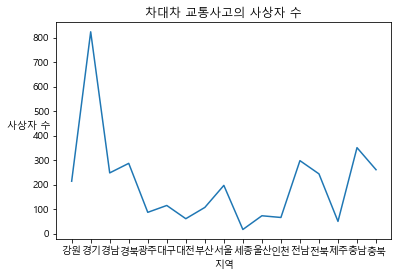

In [8]:
x=place.index
y=place.values
plt.plot(x,y)
plt.xlabel('지역')
plt.ylabel('사상자 수').set_rotation(0)
plt.title('차대차 교통사고의 사상자 수')
plt.show